# Squaring the input

This demo shows you how to construct a network
that squares the value encoded in a first population
in the output of a second population.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo

## Step 1: Create the Model

The model is comprised of an input ensemble ('A')
and an output ensemble ('B'),
from which the squared value of the input signal can be decoded.

In [2]:
# Create the model object
model = nengo.Network(label='Squaring')
with model:
    # Create two ensembles of 100 leaky-integrate-and-fire neurons
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)

## Step 2: Provide Input to the Model

A single input signal (a sine wave) will be used
to drive the neural activity in ensemble A.

In [3]:
with model:
    # Create an input node that represents a sine wave
    sin = nengo.Node(np.sin)

    # Connect the input node to ensemble A
    nengo.Connection(sin, A)

    # Define the squaring function
    def square(x):
        return x[0] * x[0]

    # Connection ensemble A to ensemble B
    nengo.Connection(A, B, function=square)

## Step 3: Probe the Output

Let's collect output data from each ensemble and output.

In [4]:
with model:
    sin_probe = nengo.Probe(sin)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)

## Step 4: Run the Model

In [5]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run the simulator for 5 seconds
    sim.run(5)

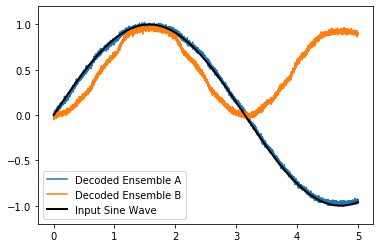

In [6]:
# Plot the input signal and decoded ensemble values
plt.figure()
plt.plot(
    sim.trange(), sim.data[A_probe], label='Decoded Ensemble A')
plt.plot(
    sim.trange(), sim.data[B_probe], label='Decoded Ensemble B')
plt.plot(
    sim.trange(), sim.data[sin_probe], label='Input Sine Wave',
    color='k', linewidth=2.0)
plt.legend(loc='best')
plt.ylim(-1.2, 1.2);

The plotted output of ensemble B should show
the decoded squared value of the input sine wave.